In [1]:
import ramCOH.functions as f
import ramCOH.processing as ram
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout()

In [2]:
ol_file = "./olivine/PI052-05_2021_11_29_15_47_53_532nm_Edge_100%_x100_VIS_LWD_H50_1800 (450-850nm)_10s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

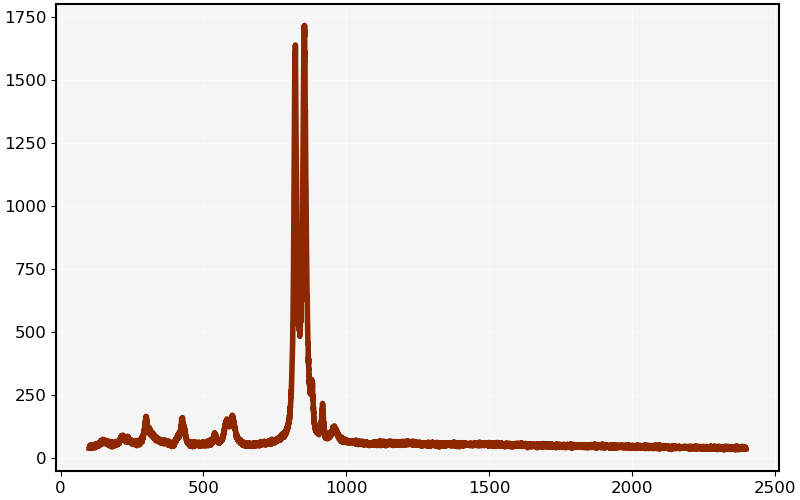

In [3]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.show()

In [4]:
birs = np.array(
    [
        [100, 140],
        [370, 380],
        [470, 515],
        [680, 740],
        [1020, 4000]
    ]
)

In [5]:

olivine = ram.olivine(x, y)
olivine.baselineCorrect(birs, smooth=1e-7)
olivine.deconvolve(noise_threshold=2.5, prominence=1., fit_window=5, baseline0=False)

noise, spline = f._calculate_noise(olivine.x, olivine.intensities["BC"])

In [6]:
paramDict = [
    {"center": i, "amplitude": j, "width": k, "shape": l, "baselevel": m}
    for _, (i, j, k, l, m) in enumerate(zip(*olivine.deconvolution_parameters))
]

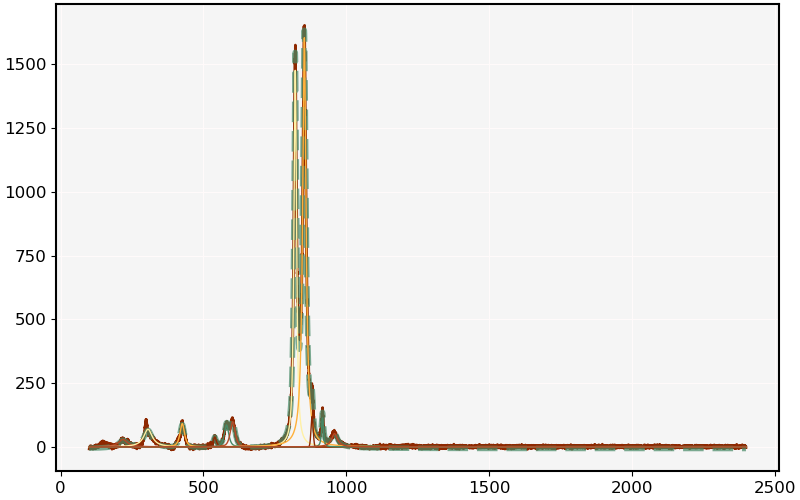

In [12]:
baselevel = sum(olivine.deconvolution_parameters[-1])

%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
# plt.plot(olivine.x, olivine.baseline)
plt.plot(olivine.x, f.sum_GaussLorenz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in paramDict:
    plt.plot(olivine.x, f.GaussLorentz(olivine.x, **curve), linewidth=1)

In [8]:
amp, cent, wid = f._find_peak_parameters(x, olivine.intensities["BC"], 2)
print(amp, cent, wid)
ranges = f._get_peakFit_ranges(cent, wid, fit_window=4)
ranges

[  34.61026985  107.16014655  103.24182817   44.18273076  114.37264549
 1575.88685531 1649.81836682 1653.16792175 1550.38679721  248.16862395
  153.30624653   64.7846074 ] [217.137 298.844 426.569 539.78  601.416 821.996 852.181 854.209 855.366
 879.337 917.268 958.094] [15.5332024  12.06965405 13.99402911  7.35072682 35.66283575  7.93721176
  0.43507047 13.52234775  0.20943265  2.19661174  5.88171267  9.98625248]


[[155.00419040186455, 347.12261620474214],
 [370.5928835479875, 744.0673430029497],
 [790.2471529767785, 998.0390099083756]]

In [9]:
range = ranges[1]
xtrim, ytrim = f._trimxy_ranges(x, olivine.intensities["BC"], range)
params, *_ = f.deconvolve_curve(xtrim, ytrim, prominence=2., noise_threshold=2, baseline0=False, extra_loops=0)

residue = ytrim - f.sum_GaussLorenz(xtrim, *params)
xtrim[np.where(residue == residue.max())], ytrim[np.where(residue == residue.max())]

/Users/thomas/Desktop/ramCOH/ramCOH/functions.py:501: UserWarning: Noise increased from last iteration, calculation stopped
  warnings.warn("Noise increased from last iteration, calculation stopped")


(array([539.78]), array([44.18273076]))

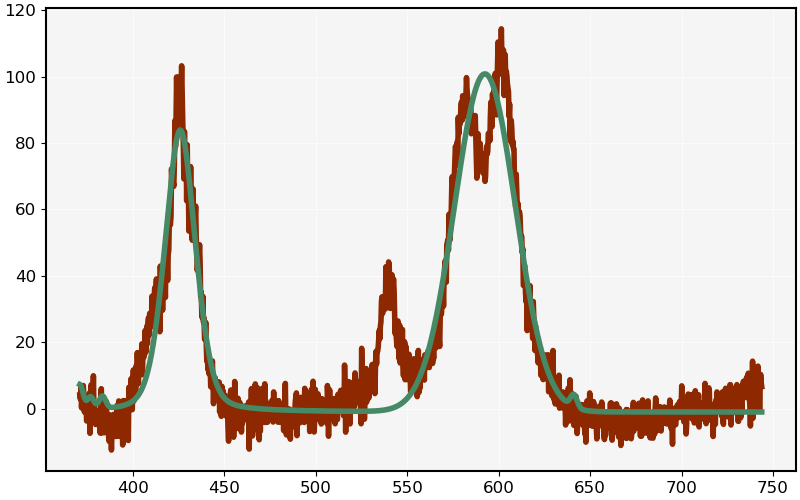

In [10]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(xtrim, ytrim)
plt.plot(xtrim, f.sum_GaussLorenz(xtrim, *params))
# plt.plot(xtrim, residue)

In [11]:

olivine.deconvolution_parameters[-1]

array([-0.64642305, -0.64635652, -0.64636317, -0.64638056, -0.64636945,
       -0.64637023, -0.64637491, -0.64637209, -0.64636112, -0.64636631,
       -0.64637217])